In [36]:
import numpy as np
import sigpy as sp
import sigpy.mri as mr
import matplotlib.pyplot as plt


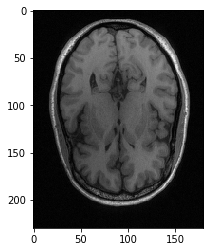

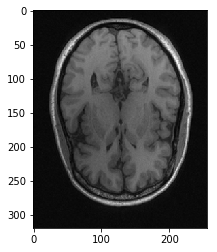

4032360300000.0
-45409470000.0


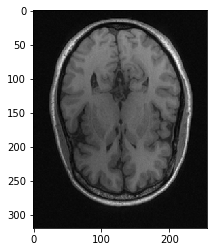

True

In [27]:


ksp = np.load('ksp.npy')
img = np.sum(np.abs(sp.fft.ifft(ksp, axes=[-1, -2]))**2, axis=0)**0.5
#img = sp.fft.ifft(ksp)
plt.imshow(img, cmap='gray')
plt.show()
np.shape(img)

import cv2

res = cv2.resize(img, dsize=(256, 320), interpolation=cv2.INTER_CUBIC)
plt.imshow(res, cmap='gray')
plt.show()

print(np.max(res))
print(np.min(res))

maxv = np.max(res)
minv = np.min(res)

normalized = -1 + (2 * (res - minv) / (maxv - minv))
deprocess  = lambda x :((x + 1) * 127).astype(np.uint8)
normalized = deprocess(normalized)

plt.imshow(normalized, cmap='gray')
plt.show()

cv2.imwrite("testimg.png", normalized)



In [53]:
all_results = np.load('../deep_prior_data/comparisons/diff_batch_sizes_gif_noise_L1.npy')
curr = all_results[2][2]
for i in range(len(curr[0])):
    im = deprocess(curr[0][i])
    cv2.imwrite("../deep_prior_data/diff_batch_sizes_gif_L1_noise/diffx2/{}.png".format(i), im[:, :, 0])
    


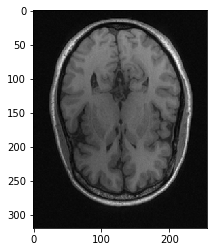

1.0
-1.0


In [35]:
image = cv2.imread('testimg.png')
preprocess = lambda x : x / 127 - 1
image = preprocess(image)
plt.imshow(image[:, :, 0], cmap='gray')
plt.show()
print(np.max(image))
print(np.min(image))